# pyROOT example

This pyROOT exmaple is based upon the [ATLAS tutorial example for SLAC Tier3](https://usatlas.github.io/tier3docs/Tutorial-2019Aug/SLAC/), which was orginally written in C++ by Shuwei Ye of BNL.

## Login to SLAC centos7 public login host

```
ssh centos7.slac.stanford.edu
```

## Set up the environment

```
export ATLAS_LOCAL_ROOT_BASE=/cvmfs/atlas.cern.ch/repo/ATLASLocalRootBase
source $ATLAS_LOCAL_ROOT_BASE/user/atlasLocalSetup.sh
asetup AnalysisBase,21.2.111
export PATH=$HOME/.local/bin:$PATH
```

## Install Jupyter locally

Unfortunately, ATLAS Analysis Releases do not include Jupyter yet. Until they fix it, a workaround is to install Jupyter locally (in your home directories) by running the following commands:

```
pip install --upgrade argparse pysqlite --user
pip install jupyter metakernel zmq --user
```

**Note** this is a one-time setup.

## Start Jupyter Notebook

Start Jupyter Notebook on centos7:

```
jupyter notebook
```

And look for string like `http://localhost:8888/?token=e2fdde186fa4d522d568c93d33b2785ee84ed2eef0971017` in the ouput. In this case, 8888 is the port Jupyter is listening on. 8888 is the also the default port for Jupyter; but if more than 1 user are running Jupyter at the same time, Jupyter may pick another port for you.

You need to forward port 8888 on centos7 to your local computer. You can use *SSH Escape Sequences* to enable port forwarding in your *existing* SSH session. Press the `Enter` key (to make sure the escape character is at the beginning of a line), then type `~C` (tilde and capital C) to open a command line (started with the prompt `ssh>`), then specify the port forwarding, e.g.:

```
ssh> -L localhost:8888:localhost:8888
```

Now you are ready to load the URL (e.g., `http://localhost:8888/?token=e2fdde186fa4d522d568c93d33b2785ee84ed2eef0971017`) in a browser on your local computer!

In [1]:
# Set up ROOT and RootCore
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
# Initialize the xAOD infrastructure
ROOT.xAOD.Init()

<ROOT.xAOD::TReturnCode object at 0x7ab6960>

xAOD::Init                INFO    Environment initialised for data access


In [3]:
# Set up the input files
fileName = 'root://atlrdr1//xrootd/atlas/atlaslocalgroupdisk/rucio/data16_13TeV/f9/bd/DAOD_SUSY15.11525262._000003.pool.root.1'
treeName = 'CollectionTree'
f = ROOT.TFile.Open(fileName)

In [4]:
# Make the "transient tree"
t = ROOT.xAOD.MakeTransientTree(f, treeName)

xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory


In [5]:
# Open TFile to store the analysis histogram output
fout = ROOT.TFile("pyROOTOutputFile.root","recreate")

# Make histograms for storage
h_njets_raw = ROOT.TH1D("h_njets_raw","",20,0,20)
h_mjj_raw = ROOT.TH1D("h_mjj_raw","",100,0,500)

In [6]:
# Print some information
print('Number of input events: %s' % t.GetEntries())

Number of input events: 855


In [7]:
for entry in xrange(t.GetEntries()):
    t.GetEntry(entry)
    if entry % 100 == 0:
        s = 'Processing entry #%i, run #%i, event #%i' % (entry+1, t.EventInfo.runNumber(), t.EventInfo.eventNumber())
        print(s)

    jets_raw = []
    for jet in t.AntiKt4EMTopoJets:
        if entry % 100 == 0:
            s = 'Jet : %f %f %f %f' % (jet.pt(), jet.eta(), jet.phi(), jet.m())
            print(s)
        jets_raw.append(jet)

    # Fill the analysis histograms accordingly
    h_njets_raw.Fill( len(jets_raw) )

    if len(jets_raw) >= 2:
        h_mjj_raw.Fill( (jets_raw[0].p4()+jets_raw[1].p4()).M()/1000. )

Processing entry #1, run #311481, event #2799269119
Jet : 468979.031250 -0.903113 -1.338824 21535.863281
Jet : 338129.406250 -1.397199 1.899061 25507.771484
Jet : 34020.144531 0.266506 1.634250 5874.876465
Jet : 20760.699219 -1.918634 1.793700 4058.307373
Jet : 12562.199219 -2.199457 -1.570707 2341.375000
Jet : 6962.007324 -0.831885 1.312302 1536.696411
Processing entry #101, run #311481, event #2810933683
Jet : 277991.718750 2.747532 0.437236 -0.031311
Jet : 96786.906250 0.414741 -2.691716 14359.251953
Jet : 5324.694336 3.453864 2.134077 0.000000
Processing entry #201, run #311481, event #3020641387
Jet : 106057.804688 -0.651156 -1.015127 8673.697266
Jet : 42092.828125 0.094121 0.330564 4003.670166
Jet : 31360.287109 -0.533367 -1.615798 4897.545898
Jet : 28205.761719 1.478483 -0.483636 4177.464844
Jet : 11727.797852 -1.089316 1.468481 2243.973633
Jet : 7993.039062 0.953590 0.566631 1193.087769
Jet : 7598.682129 2.214137 -1.919347 1481.385742
Jet : 6116.664551 2.699726 0.451797 815.955

In [8]:
# Save the output file
fout.Write()
fout.Close()

In [9]:
# Read the output file
fout = ROOT.TFile("pyROOTOutputFile.root","read")
h_mjj_raw = fout.Get('h_mjj_raw')

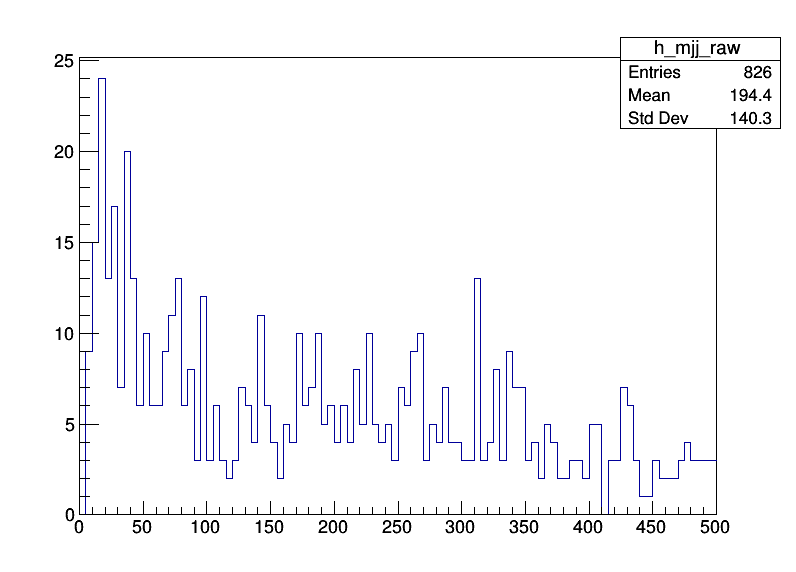

In [10]:
# Display the histogram
# %jsroot on
c = ROOT.TCanvas("Canvas 1","Canvas 1",800,600)
h_mjj_raw.Draw()
c.Draw()

In [11]:
fout.Close()